In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn. model_selection import train_test_split
from sklearn. model_selection import RepeatedStratifiedKFold
from sklearn. model_selection import cross_val_score
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

random.seed(42)

sns.set_theme(style="ticks")

Будем использовать данные по качеству вина (подробное описание смотреть в практике по классификации)

In [17]:
df = pd.read_csv('winequality-red2.csv', delimiter=',')
df = df.assign(quality = df['quality'] >= 6)
print(df.head())
print(df.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4    False  
1      9.8    False  
2      9.8    False 

In [18]:
df1 = df[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]


In [19]:
df1_train, df1_test = train_test_split(df1, test_size=0.2)


Проведем предобработку данных:

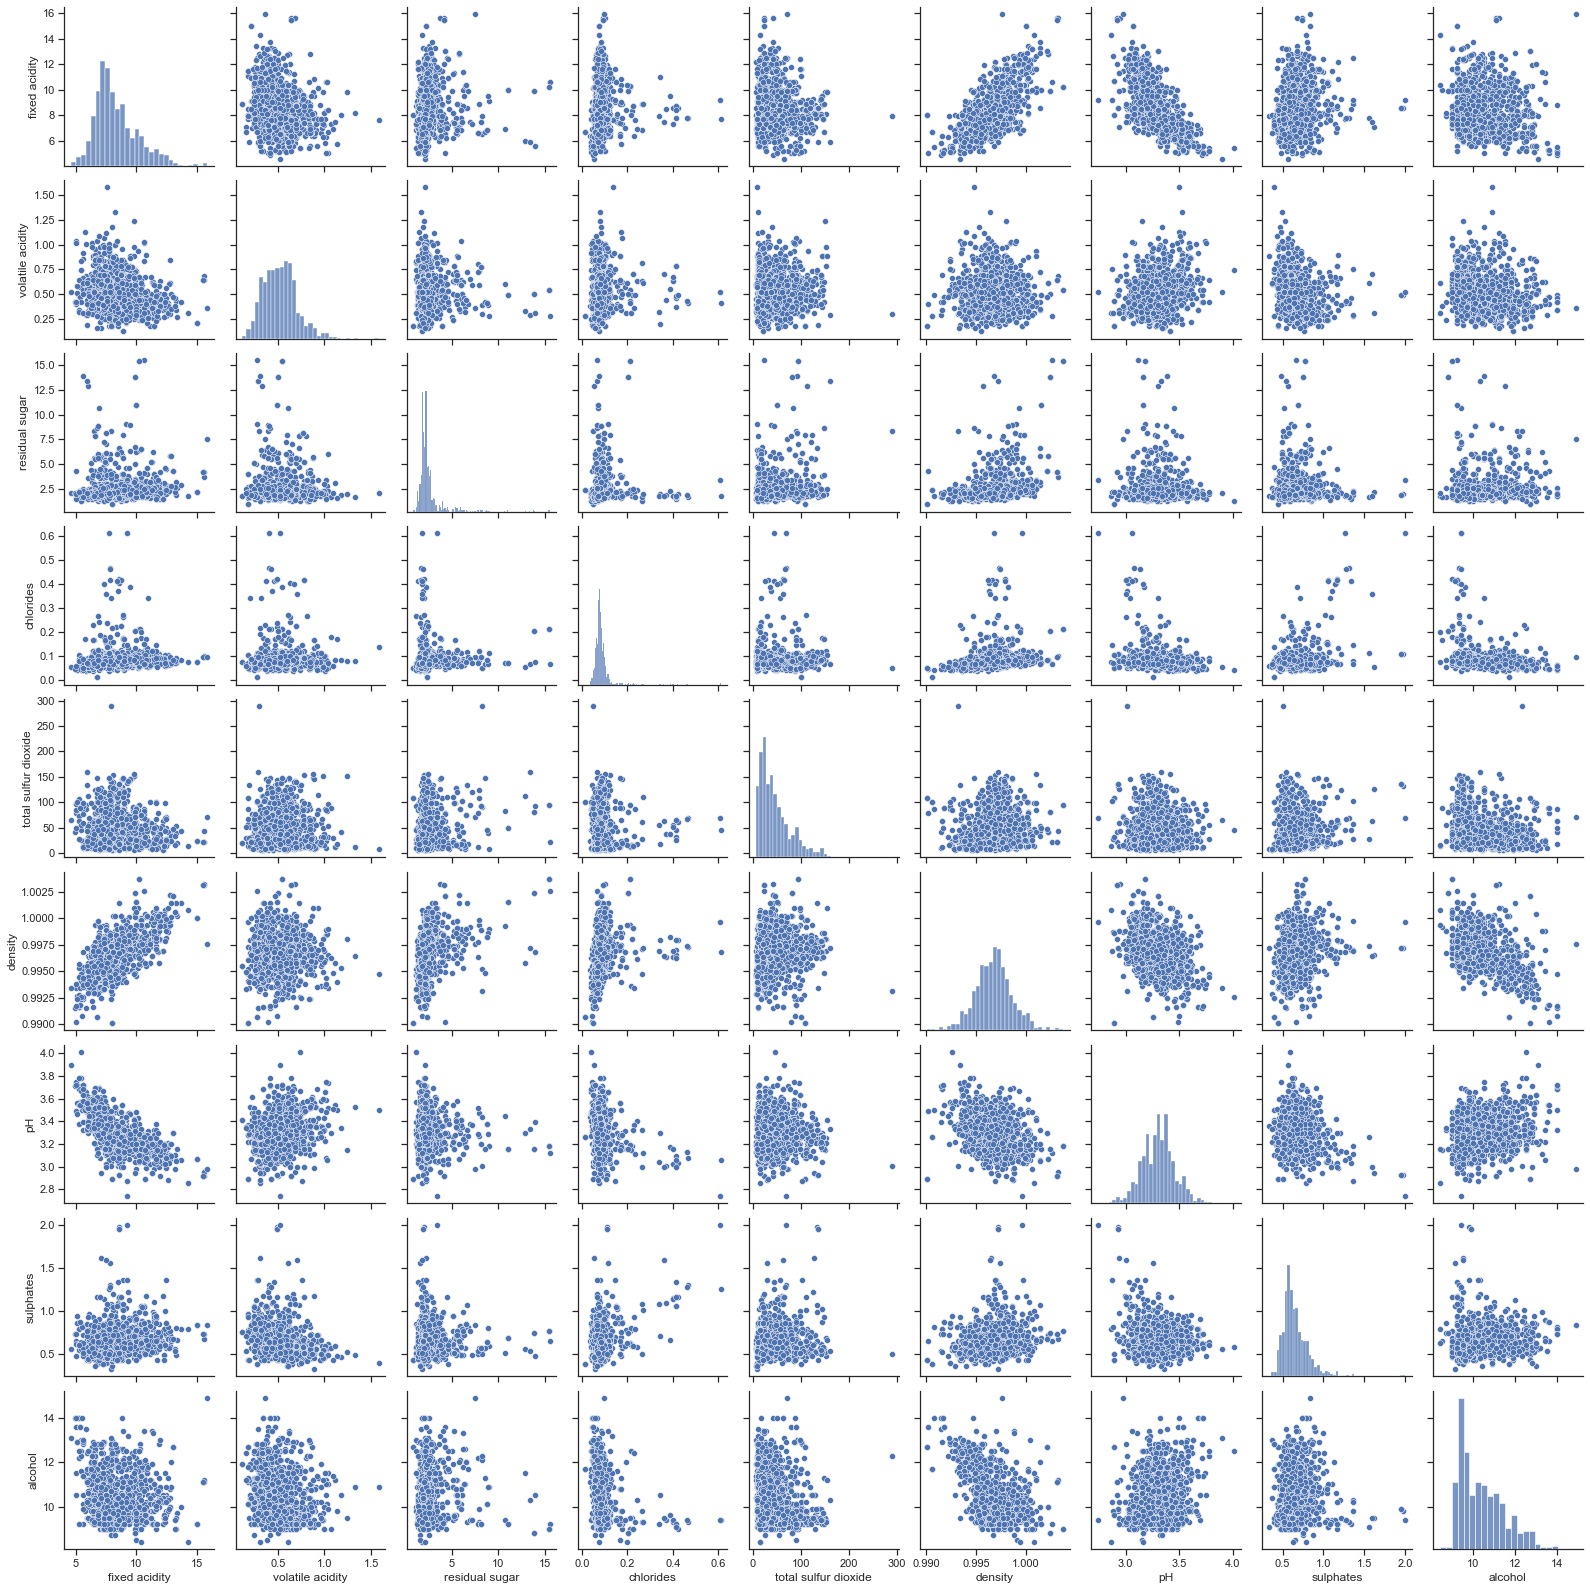

In [20]:
plt.show(sns.pairplot(df1_train.iloc[:, :-1]))

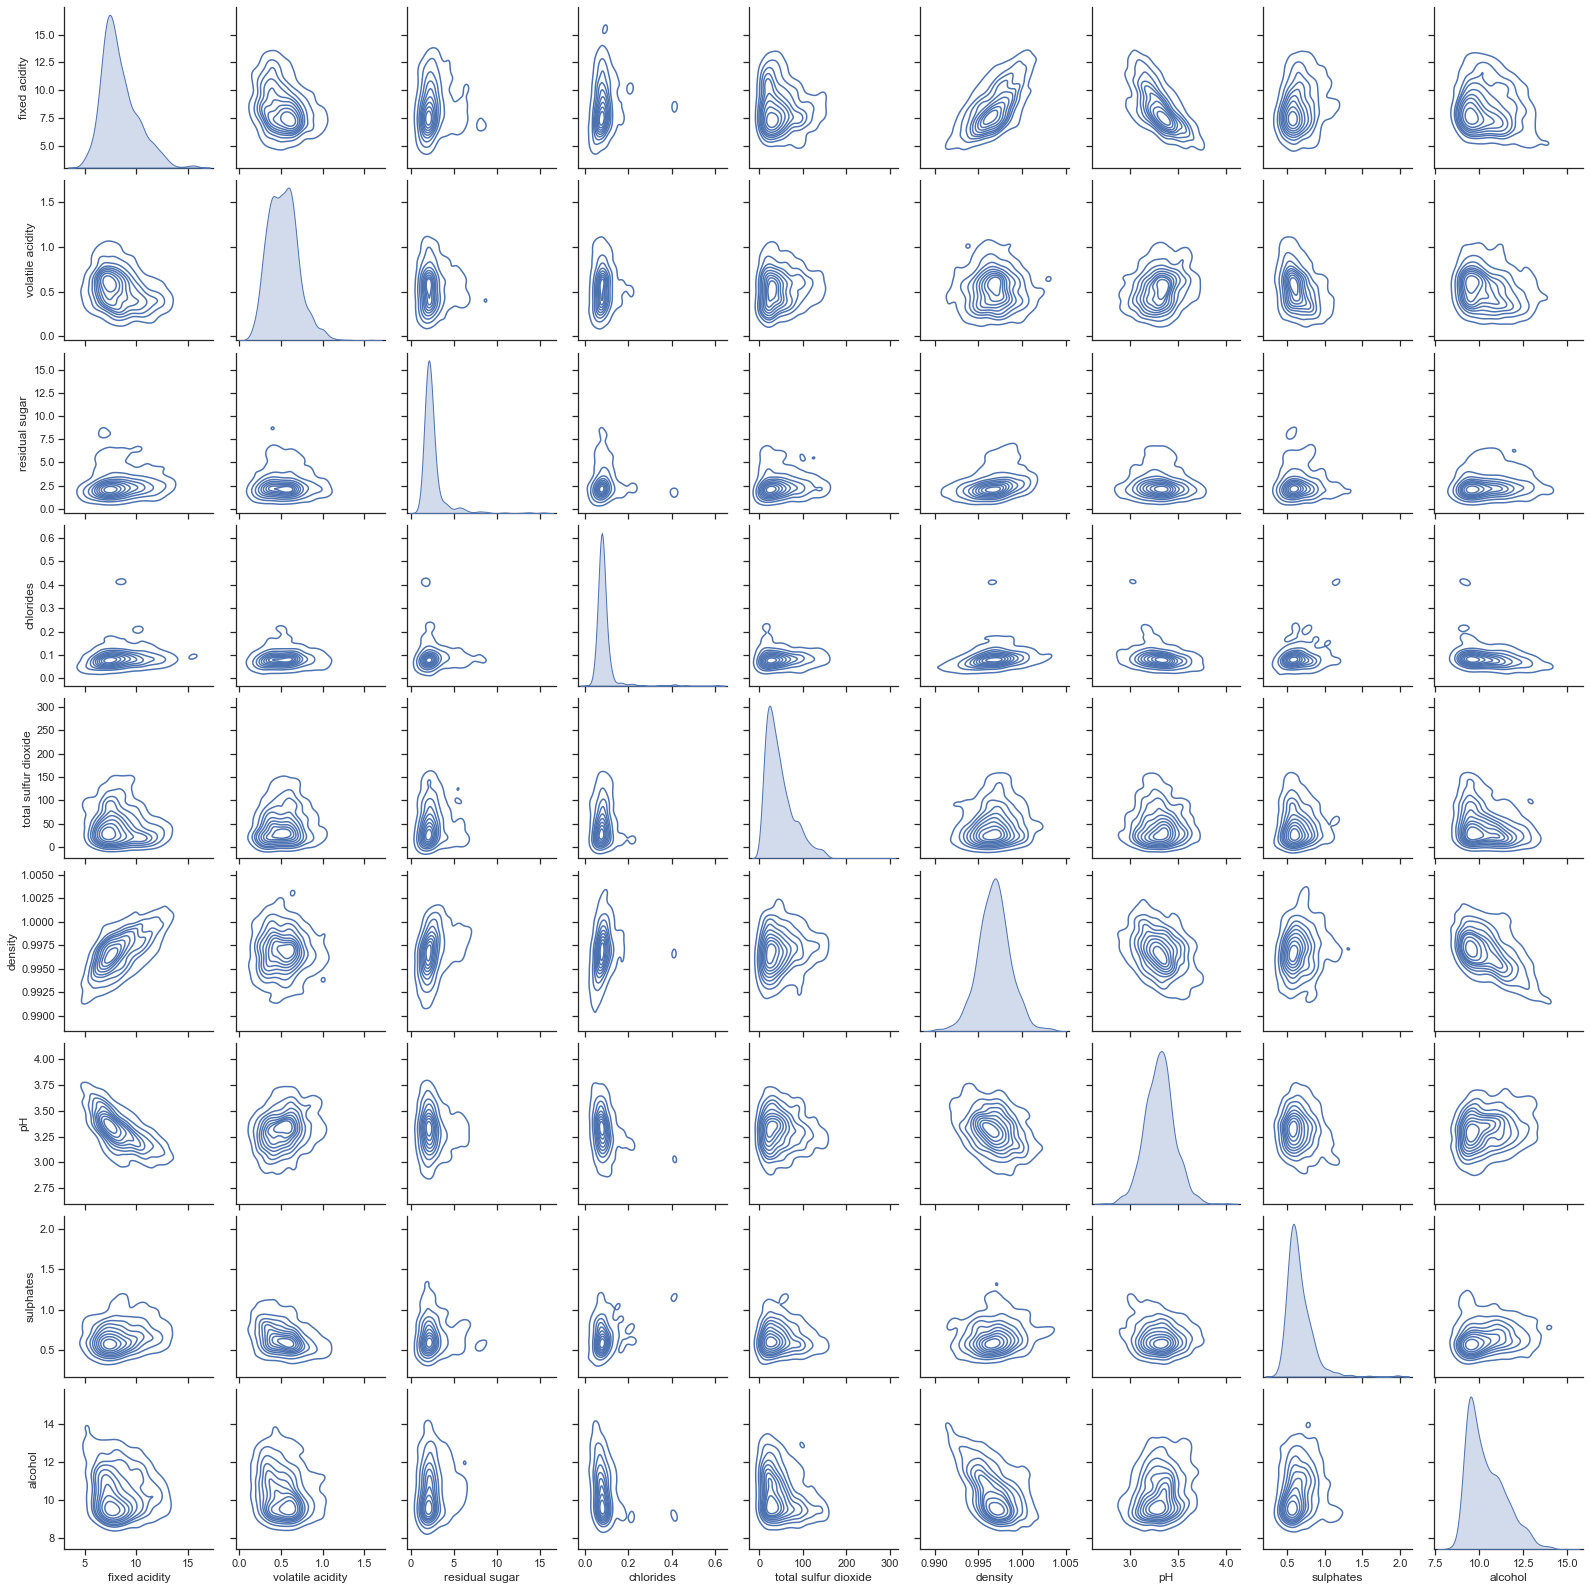

In [21]:
plt.show(sns.pairplot(df1_train.iloc[:, :-1], kind="kde"))

In [22]:
df1_train.insert(1, 'fixed_acidity_log', np.log(df1_train['fixed acidity']))
df1_train.insert(1, 'residual_sugar_log', np.log(df1_train['residual sugar']))
df1_train.insert(1, 'volatile_acidity', df1_train['volatile acidity'])
df1_train.insert(1, 'chlorides_log', np.log(df1_train['chlorides']))
df1_train.insert(1, 'total_sulfur_dioxide_log', np.log(df1_train['total sulfur dioxide']))
df1_train.insert(1, 'pH_log', np.log(df1_train['pH']))
df1_train.insert(1, 'sulphates_log', np.log(df1_train['sulphates']))
df1_train.insert(1, 'alcohol_log', np.log(df1_train['alcohol']))

In [23]:
df1_train = df1_train.drop(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'], axis = 1)

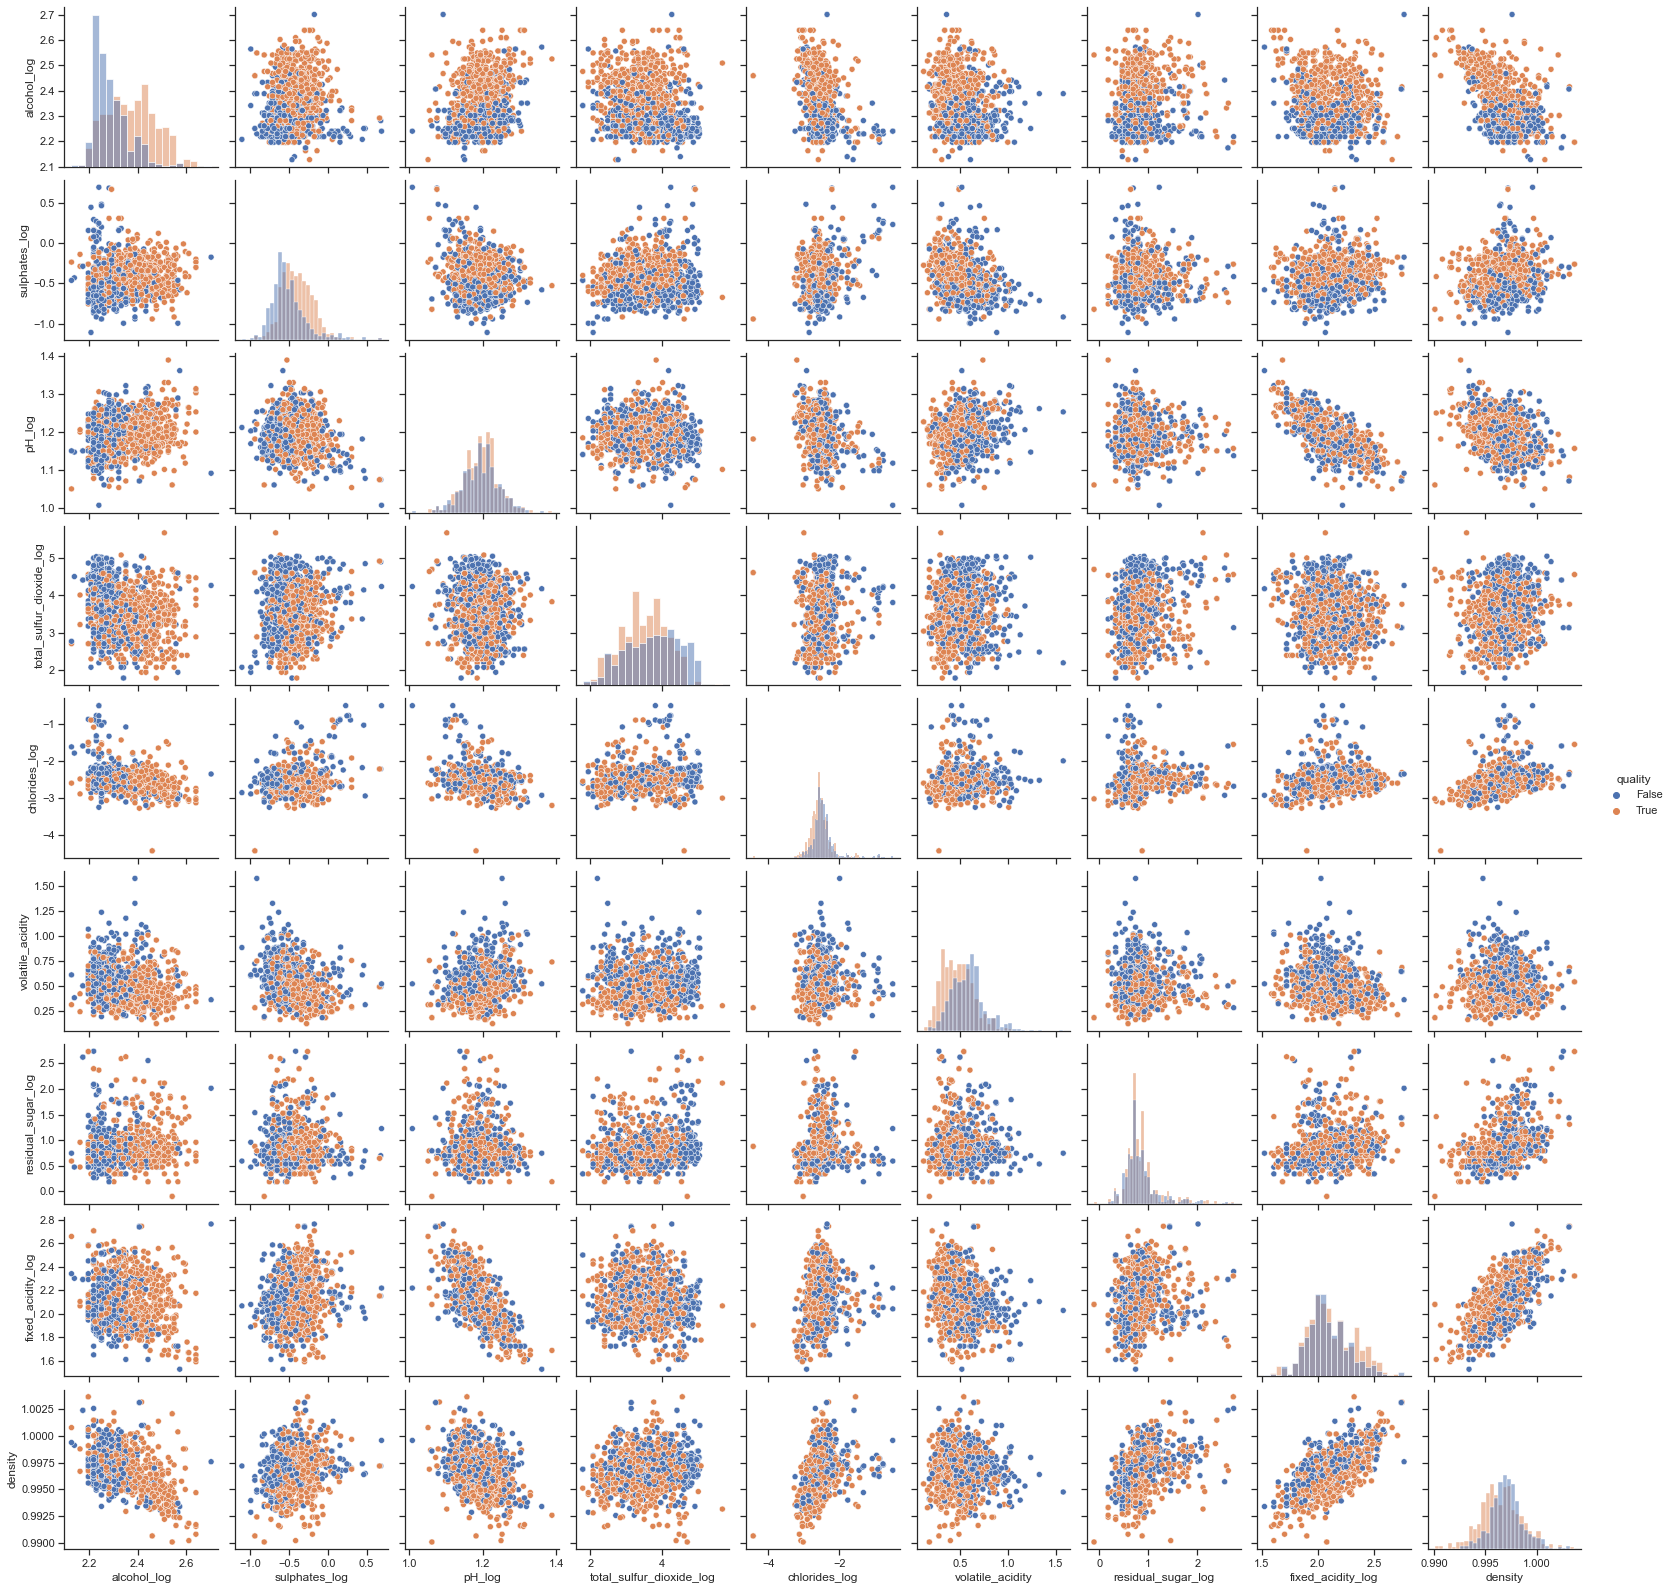

In [24]:
plt.show(sns.pairplot(df1_train, hue = 'quality', diag_kind='hist'))

In [25]:
df1_train = df1_train.drop(df1_train[df1_train.chlorides_log < -4].index)
df1_train = df1_train.drop(df1_train[df1_train.total_sulfur_dioxide_log > 5.1].index)
df1_train = df1_train.drop(df1_train[df1_train.alcohol_log > 2.7].index)

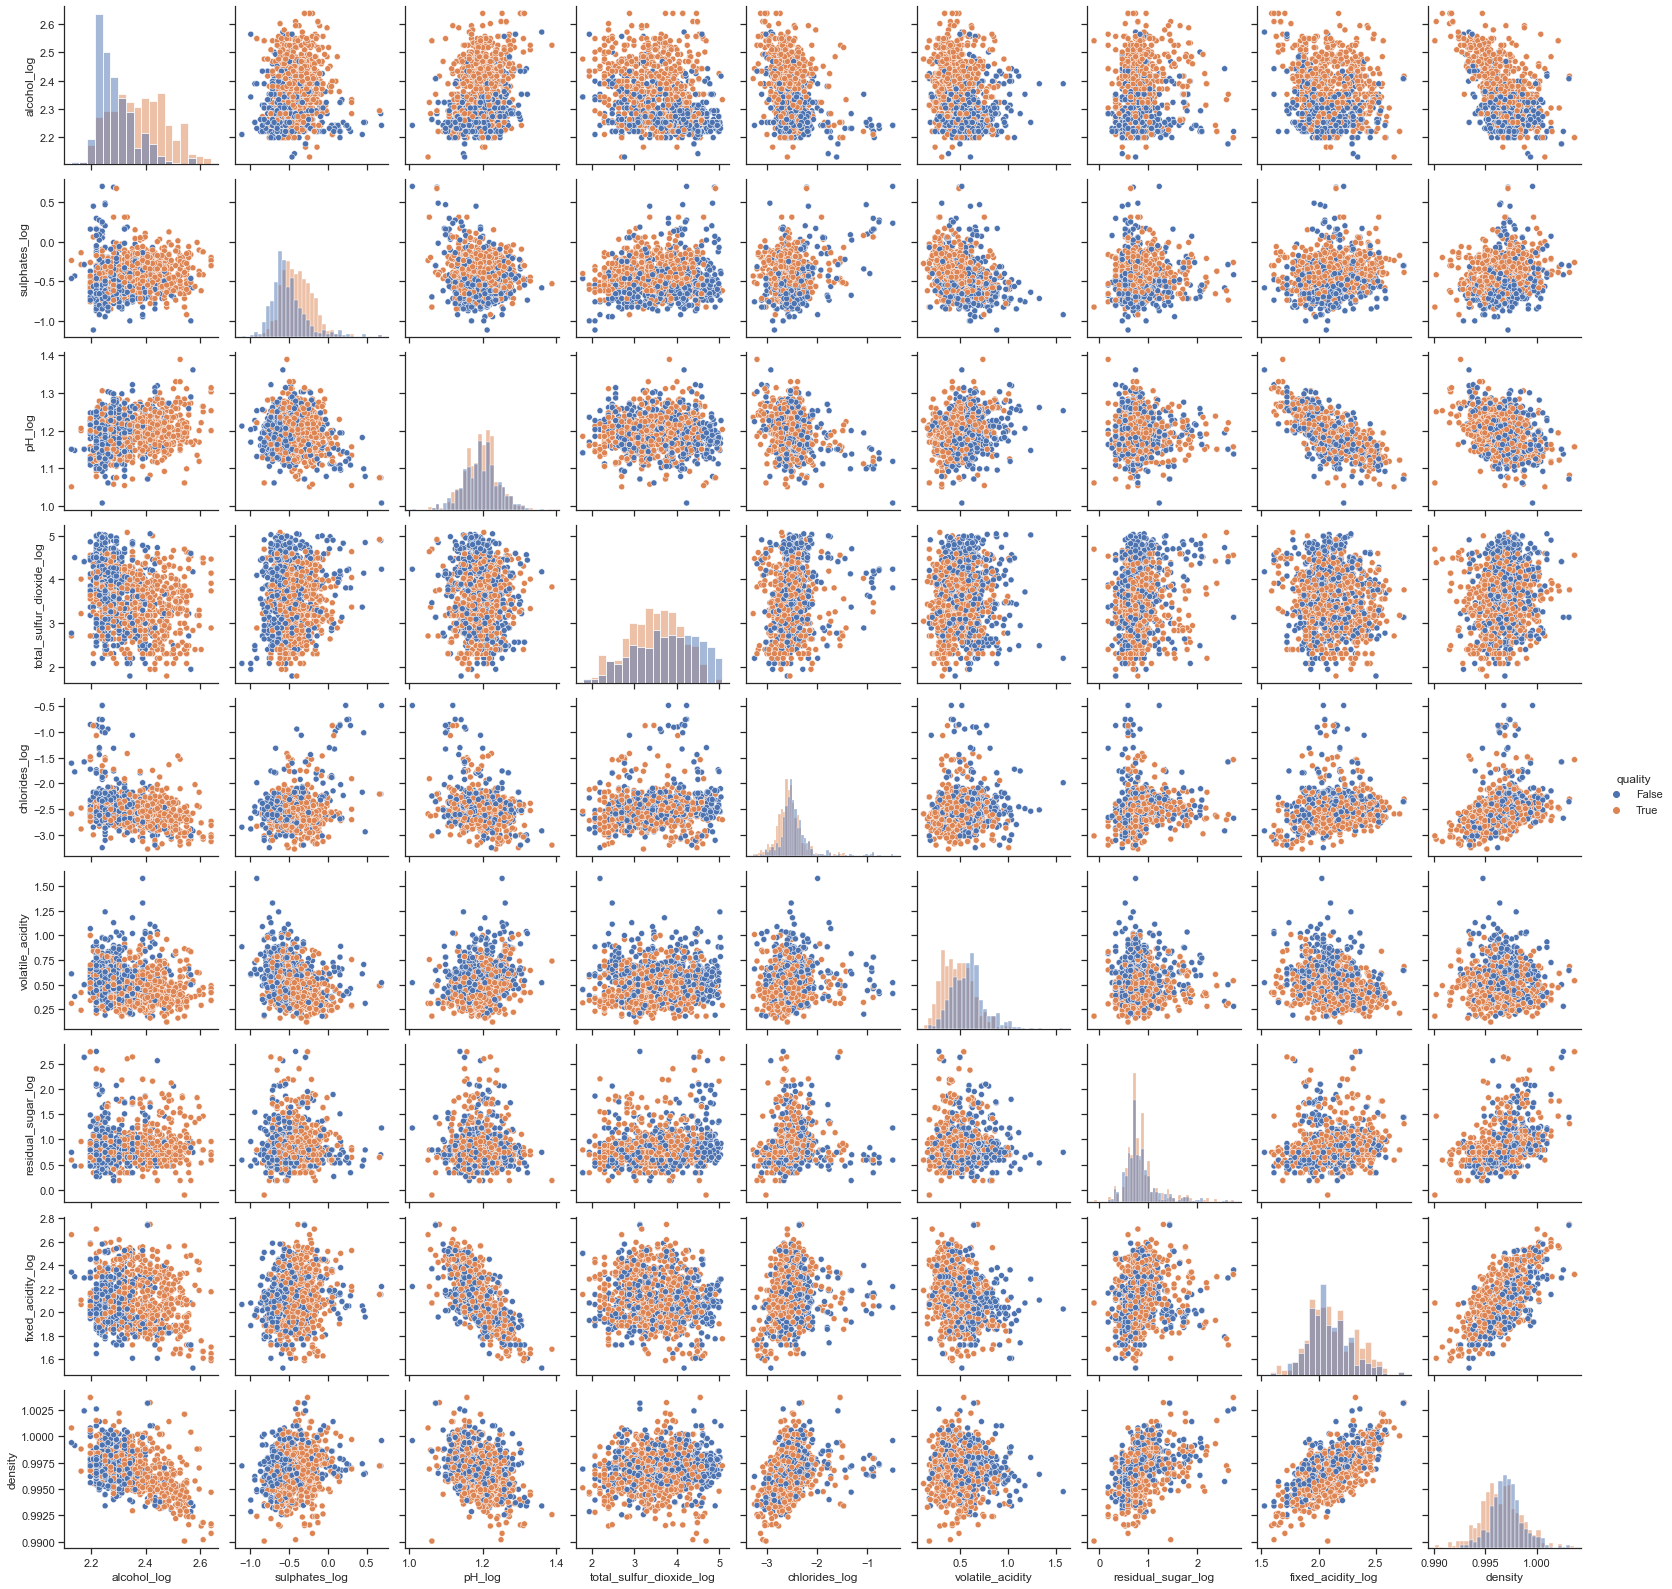

In [26]:
plt.show(sns.pairplot(df1_train, hue = 'quality', diag_kind='hist'))

In [27]:
df1_test.insert(1, 'fixed_acidity_log', np.log(df1_test['fixed acidity']))
df1_test.insert(1, 'residual_sugar_log', np.log(df1_test['residual sugar']))
df1_test.insert(1, 'volatile_acidity', df1_test['volatile acidity'])
df1_test.insert(1, 'chlorides_log', np.log(df1_test['chlorides']))
df1_test.insert(1, 'total_sulfur_dioxide_log', np.log(df1_test['total sulfur dioxide']))
df1_test.insert(1, 'pH_log', np.log(df1_test['pH']))
df1_test.insert(1, 'sulphates_log', np.log(df1_test['sulphates']))
df1_test.insert(1, 'alcohol_log', np.log(df1_test['alcohol']))
df1_test = df1_test.drop(['fixed acidity', 'volatile acidity','residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'], axis = 1)

In [28]:
X_train = df1_train.iloc[:, :-1].to_numpy()
X_test = df1_test.iloc[:, :-1].to_numpy()
y_train = df1_train['quality'].astype(int).to_numpy()
y_test = df1_test['quality'].astype(int).to_numpy()

Обучим модель при фиксированных гиперпараметрах. И построим графики зависимости ошибки на train и validated выборках от номера эпохи.

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,), activation='relu',
                    solver='adam',
                    alpha=1e-4, verbose=False, learning_rate_init=.0001, max_iter=1, warm_start=True, early_stopping = False)
mlp_score1 = np.array([])
mlp_score2 = np.array([])
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, train_size=0.75, stratify=y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


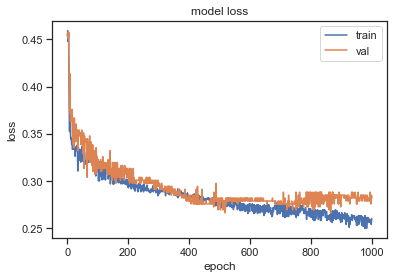

In [41]:
for i in range(1000):
    mlp.fit(X_train1, y_train1)
    mlp_score1 = np.append(mlp_score1, mlp.score(X_train1, y_train1))
    mlp_score2 = np.append(mlp_score2, mlp.score(X_train2, y_train2))
plt.figure()
plt.plot(1 - mlp_score1)
plt.plot(1 - mlp_score2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper right')
plt.show()    

В определенный момент, примерно на 500 эпохе модель показывает результаты хуже на validated выборке, так как сильно подстроена под test.

Проверим качество классификации для 3 вариантов: без стандартизации, mean normalization, min-max normalization. 

In [57]:
GRID = [
    {'estimator': [MLPClassifier()],
     'estimator__solver': ['adam', 'sgd'],
     'estimator__learning_rate_init': [0.1, 0.001, 0.0001],
     'estimator__max_iter': [500],
     'estimator__hidden_layer_sizes': [(300,), (250,), (200,), (150,)],
     'estimator__activation': ['logistic', 'relu', 'tanh'],
     'estimator__alpha': [1e-4, 1e-3],
     'estimator__early_stopping': [True, False]
     }
]

PIPELINE = Pipeline([('scaler', None), ('estimator', MLPClassifier())])

In [58]:
grid_search = GridSearchCV(estimator=PIPELINE, param_grid=GRID, 
                            scoring=make_scorer(accuracy_score),# average='macro'), 
                            n_jobs=-1, cv=5, refit=True, verbose=1, 
                            return_train_score=True)

In [59]:
random.seed(1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator', MLPClassifier())]),
             n_jobs=-1,
             param_grid=[{'estimator': [MLPClassifier(hidden_layer_sizes=(250,),
                                                      max_iter=500)],
                          'estimator__activation': ['logistic', 'relu', 'tanh'],
                          'estimator__alpha': [0.0001, 0.001],
                          'estimator__early_stopping': [True, False],
                          'estimator__hidden_layer_sizes': [(300,), (250,),
                                                            (200,), (150,)],
                          'estimator__learning_rate_init': [0.1, 0.001, 0.0001],
                          'estimator__max_iter': [500],
                          'estimator__solver': ['adam', 'sgd']}],
             return_train_score=True, scoring=make_scorer(accuracy_score),
             verbose=1)

In [60]:
print(grid_search.score(X_train, y_train))
print(grid_search.best_params_)

0.7521568627450981
{'estimator': MLPClassifier(hidden_layer_sizes=(250,), max_iter=500), 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__early_stopping': False, 'estimator__hidden_layer_sizes': (250,), 'estimator__learning_rate_init': 0.001, 'estimator__max_iter': 500, 'estimator__solver': 'adam'}


In [61]:
print("Test set score: %f" % grid_search.score(X_test, y_test))

Test set score: 0.750000


Без нормализации accuracy = 0.75

In [62]:
dff = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)])
dff1 = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)])
normalizedStd_df = (dff-dff.mean())/dff.std()
normalizedStd_df['quality'] = dff1
normalizedMinMax_df=(dff-dff.min())/(dff.max()-dff.min())
normalizedMinMax_df['quality'] = dff1
df_normalizedStd_train, df_normalizedStd_test = train_test_split(normalizedStd_df, test_size=0.2)
df_normalizedMinMax_train, df_normalizedMinMax_test = train_test_split(normalizedMinMax_df, test_size=0.2)

In [63]:
X_normalizedStd_train = df_normalizedStd_train.iloc[:, :-1].to_numpy()
X_normalizedStd_test = df_normalizedStd_test.iloc[:, :-1].to_numpy()
y_normalizedStd_train = df_normalizedStd_train['quality'].astype(int).to_numpy()
y_normalizedStd_test = df_normalizedStd_test['quality'].astype(int).to_numpy()

In [64]:
random.seed(1)
grid_search.fit(X_normalizedStd_train, y_normalizedStd_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator', MLPClassifier())]),
             n_jobs=-1,
             param_grid=[{'estimator': [MLPClassifier(activation='logistic',
                                                      hidden_layer_sizes=(200,),
                                                      learning_rate_init=0.1,
                                                      max_iter=500)],
                          'estimator__activation': ['logistic', 'relu', 'tanh'],
                          'estimator__alpha': [0.0001, 0.001],
                          'estimator__early_stopping': [True, False],
                          'estimator__hidden_layer_sizes': [(300,), (250,),
                                                            (200,), (150,)],
                          'estimator__learning_rate_init': [0.1, 0.001, 0.0001],
                          'estimator__max_iter': [500],
                          'estimator__solver': ['adam', 'sgd']}],
             return_train_score=True, scoring=make_scorer(accuracy_score),
             verbose=1)

In [65]:
print(grid_search.score(X_normalizedStd_train, y_normalizedStd_train))
print(grid_search.best_params_)

0.9984326018808778
{'estimator': MLPClassifier(activation='logistic', hidden_layer_sizes=(200,),
              learning_rate_init=0.1, max_iter=500), 'estimator__activation': 'logistic', 'estimator__alpha': 0.0001, 'estimator__early_stopping': False, 'estimator__hidden_layer_sizes': (200,), 'estimator__learning_rate_init': 0.1, 'estimator__max_iter': 500, 'estimator__solver': 'adam'}


In [66]:
print("Test set score: %f" % grid_search.score(X_normalizedStd_test, y_normalizedStd_test))

Test set score: 0.780564


При mean normalization accuracy = 0.78

In [67]:
X_normalizedMinMax_train = df_normalizedMinMax_train.iloc[:, :-1].to_numpy()
X_normalizedMinMax_test = df_normalizedMinMax_test.iloc[:, :-1].to_numpy()
y_normalizedMinMax_train = df_normalizedMinMax_train['quality'].astype(int).to_numpy()
y_normalizedMinMax_test = df_normalizedMinMax_test['quality'].astype(int).to_numpy()

In [68]:
random.seed(1)
grid_search.fit(X_normalizedMinMax_train, y_normalizedMinMax_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator', MLPClassifier())]),
             n_jobs=-1,
             param_grid=[{'estimator': [MLPClassifier(alpha=0.001,
                                                      hidden_layer_sizes=(250,),
                                                      max_iter=500)],
                          'estimator__activation': ['logistic', 'relu', 'tanh'],
                          'estimator__alpha': [0.0001, 0.001],
                          'estimator__early_stopping': [True, False],
                          'estimator__hidden_layer_sizes': [(300,), (250,),
                                                            (200,), (150,)],
                          'estimator__learning_rate_init': [0.1, 0.001, 0.0001],
                          'estimator__max_iter': [500],
                          'estimator__solver': ['adam', 'sgd']}],
             return_train_score=True, scoring=make_scorer(accuracy_score),
             verbose=1)

In [69]:
print(grid_search.score(X_normalizedMinMax_train, y_normalizedMinMax_train))
print(grid_search.best_params_)

0.7719435736677116
{'estimator': MLPClassifier(alpha=0.001, hidden_layer_sizes=(250,), max_iter=500), 'estimator__activation': 'relu', 'estimator__alpha': 0.001, 'estimator__early_stopping': False, 'estimator__hidden_layer_sizes': (250,), 'estimator__learning_rate_init': 0.001, 'estimator__max_iter': 500, 'estimator__solver': 'adam'}


In [70]:
print("Test set score: %f" % grid_search.score(X_normalizedMinMax_test, y_normalizedMinMax_test))

Test set score: 0.739812


При min-max normalization accuracy = 0.74

Лучшие результаты показала mean normalization.